In [35]:
# Import Modules

In [22]:
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Load data set

In [86]:
salary_data = pd.read_csv('../datasets/Salary.csv')

In [ ]:
# view data distribution

<Axes: xlabel='YearsExperience', ylabel='Count'>

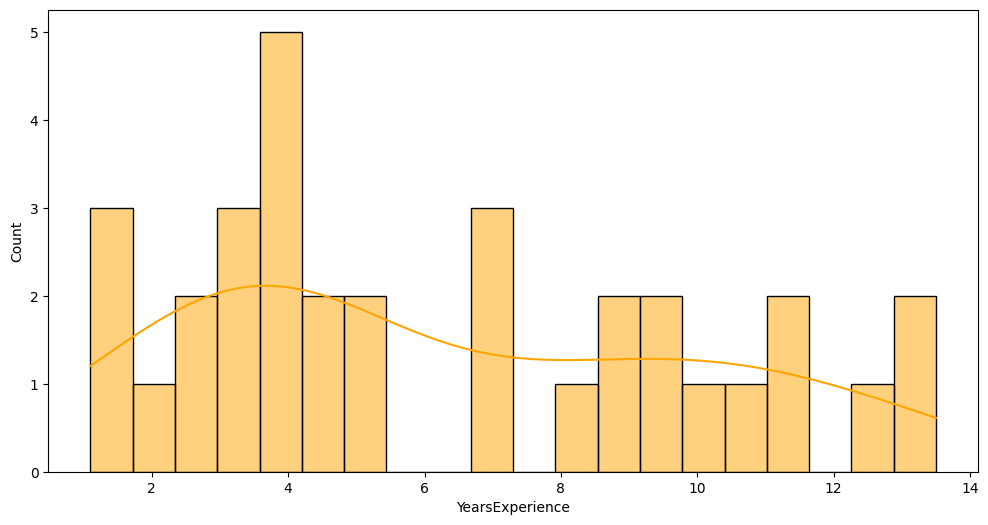

In [29]:
plt.figure(figsize = (12,6))
sns.histplot(x=salary_data['YearsExperience'], bins = 20, kde = True, color = 'orange')

<Axes: ylabel='YearsExperience'>

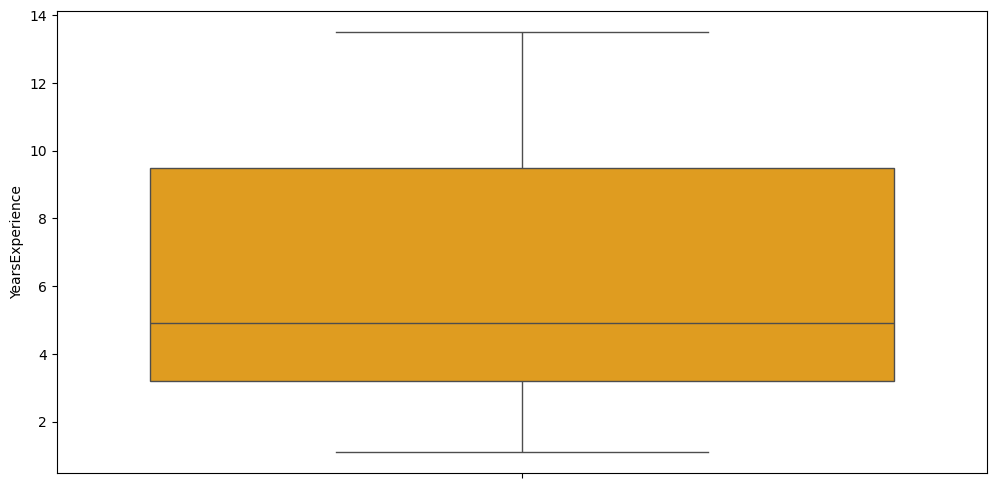

In [31]:
plt.figure(figsize = (12,6))
sns.boxplot(y=salary_data['YearsExperience'], color = 'orange')

<Axes: xlabel='Salary', ylabel='Count'>

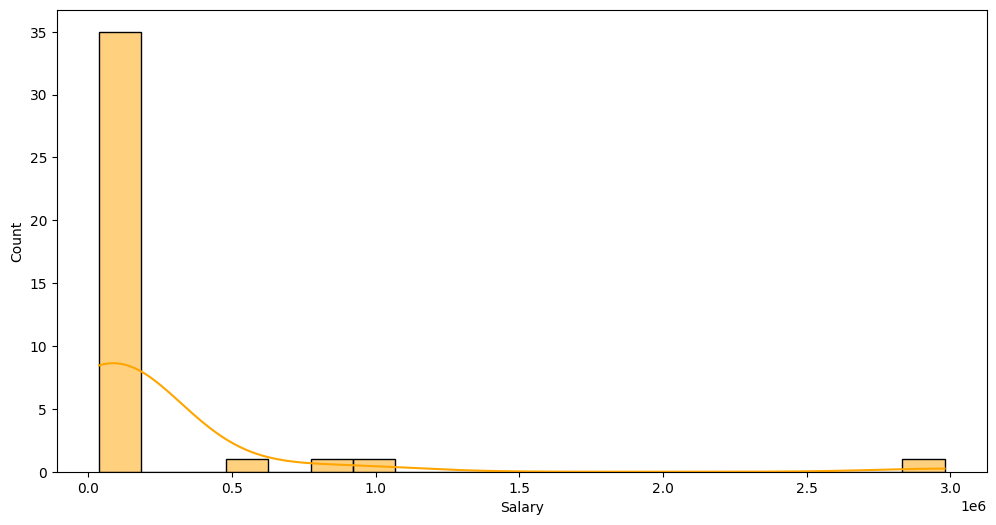

In [30]:
plt.figure(figsize = (12,6))
sns.histplot(x=salary_data['Salary'], bins = 20, kde = True, color = 'orange')

<Axes: ylabel='Salary'>

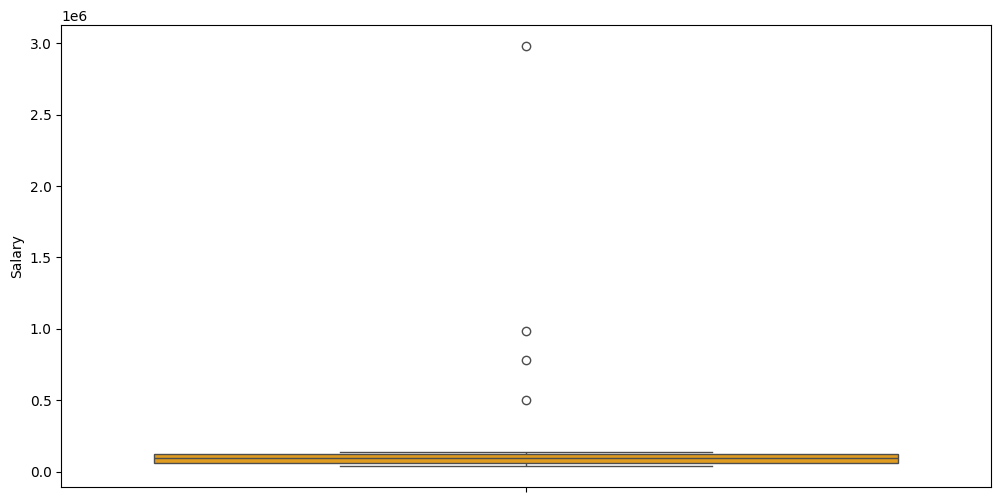

In [34]:
plt.figure(figsize = (12,6))
sns.boxplot(y=salary_data['Salary'], color = 'orange')

In [37]:
# Filter outliers
# Strategy
# Find InterQuartileRanger IQR (Q3 - Q1)
# Values below IQR*1.5 of Q1 => Q1 - 1.5*IQR are outliers
# Values above IQR*1.5 of Q3 => Q3 + 1.5*IQR are outliers

In [87]:
Q1 = salary_data.quantile(0.25, axis=0)
Q3 = salary_data.quantile(0.75, axis=0)
IQR = Q3-Q1 

In [88]:
salary_data_outliers = salary_data[((salary_data < (Q1 - 1.5 * IQR)) | (salary_data > (Q3 + 1.5*IQR))).any(axis = 1)]

In [94]:
salary_data = salary_data[~salary_data.Salary.isin(salary_data_outliers.Salary)]

In [ ]:
# Replace missing years of experience cells with the mean years of experience

In [91]:
mean_years_experience = salary_data['YearsExperience'].mean()

In [92]:
salary_data['YearsExperience'] = salary_data['YearsExperience'].fillna(value = mean_years_experience)

In [ ]:
# Plot salary and years of experience and we will see a straight line model, so its good to apply linear regression

Text(0, 0.5, 'Salary')

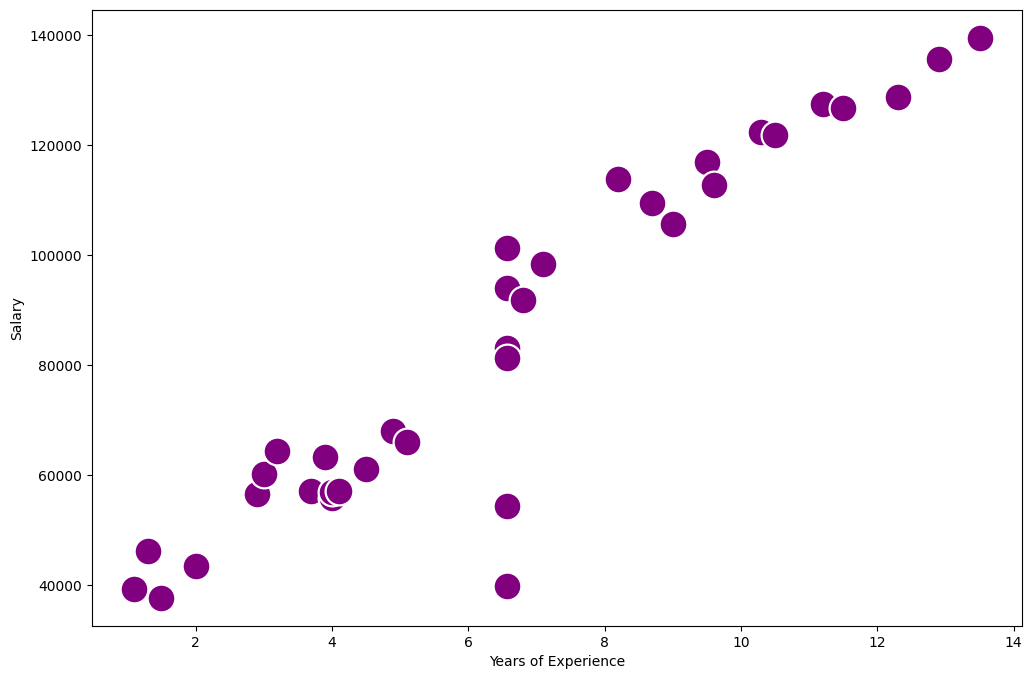

In [100]:
plt.figure(figsize = (12,8))
sns.scatterplot(x = 'YearsExperience', y = 'Salary', s = 400, color = 'purple', data = salary_data)
plt.xlabel('Years of Experience')
plt.ylabel('Salary')

In [ ]:
# split data in to test, train set
# 30% of data to evaluate and 70% to train model

In [102]:
x = salary_data['YearsExperience']
y = salary_data['Salary']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.3,random_state=42)

In [ ]:
# change all the sets to numpy array
# change it to 2d array using reshape

In [103]:
x_train = x_train.to_numpy()
x_train = x_train.reshape((-1,1))
y_train = y_train.to_numpy()
y_train = y_train.reshape((-1,1))


In [107]:
x_test = x_test.to_numpy()
x_test = x_test.reshape((-1,1))
y_test = y_test.to_numpy()
y_test = y_test.reshape((-1,1))


array([[ 9.5       ],
       [ 4.1       ],
       [ 8.7       ],
       [ 7.1       ],
       [ 4.9       ],
       [10.5       ],
       [ 6.56206897],
       [ 4.        ],
       [ 3.2       ],
       [ 5.1       ],
       [ 3.7       ]])

In [ ]:
# Train the linear regression model

In [109]:
lr = LinearRegression()
linear_regression_model = lr.fit(x_train, y_train)

In [ ]:
# Predict the test data using trained model

In [111]:
y_pred = linear_regression_model.predict(x_test)

In [113]:
linear_regression_model.score(x_train, y_train)

0.8714318074107308

In [ ]:
# Find the R squared value

In [114]:
linear_regression_model.score(x_test, y_test)

0.909177248778591

In [ ]:
# Scatter plot training and testing data to see how the model 

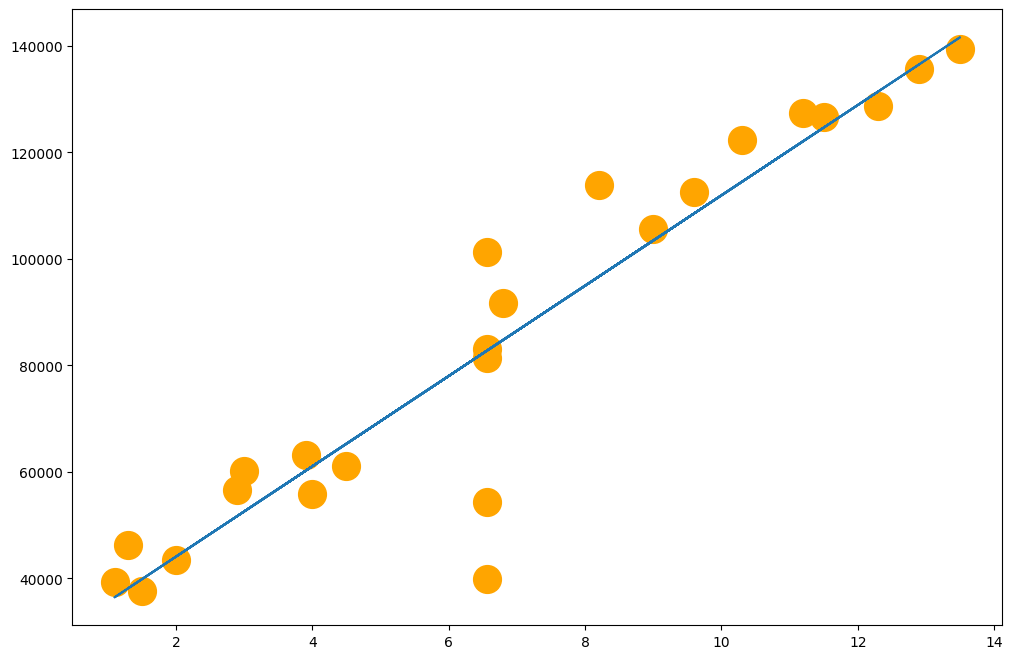

In [115]:
f,ax = plt.subplots(figsize=(12,8))
plt.plot(x_train, y_train, 'o', markersize = 20, color = 'orange')
plt.plot(x_train, linear_regression_model.coef_ * x_train + linear_regression_model.intercept_)

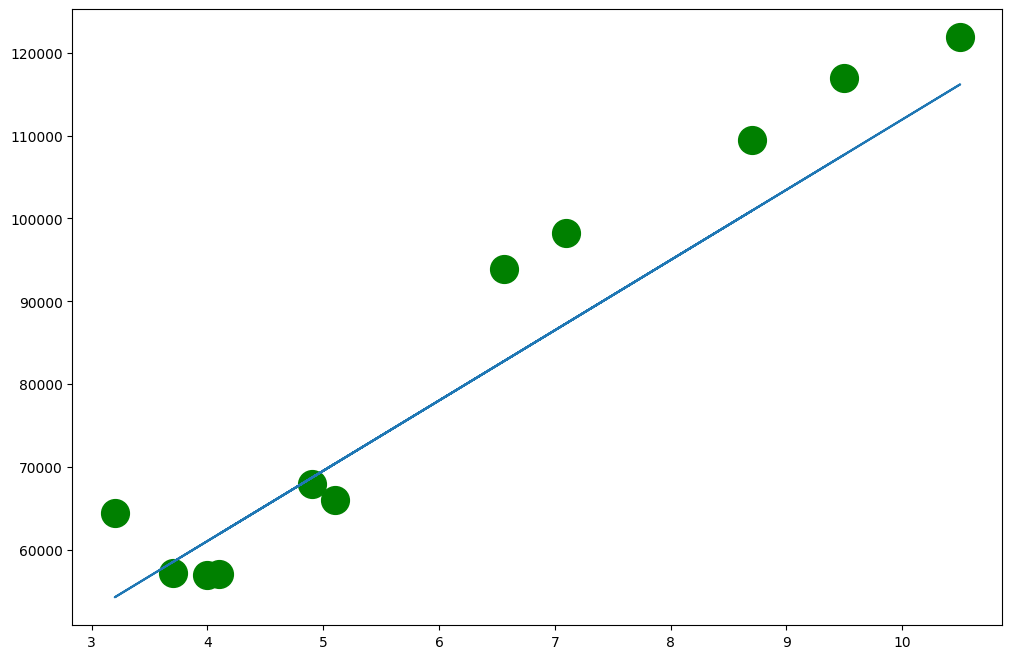

In [117]:
f,ax = plt.subplots(figsize=(12,8))
plt.plot(x_test, y_test, 'o', markersize = 20, color = 'green')
plt.plot(x_test, linear_regression_model.coef_ * x_test + linear_regression_model.intercept_)